### Connect to SQL Magic 

In [1]:
%load_ext sql
%sql sqlite://

'Connected: @None'

### Load data

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\anafi\Documents\Personal\Applications\2020\Roche\Tasks\Task1\IRISES.csv", sep="|")

### Data preparation

In [3]:
# View data
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# View datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null object
Species         150 non-null object
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [5]:
# Replace commas and convert datatype of column 'Petal.Width' to float64
df['Petal.Width']=df['Petal.Width'].str.replace(',', '.').astype(float)

In [6]:
# Confirm changes
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### Data analysis and visualization

In [7]:
df['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,150.000000,150.000000
mean,5.779333,3.061745,3.758000,1.199333
std,1.197721,0.433963,1.765298,0.762238
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
%sql select AVG("Petal.Length"), AVG("Petal.Width"), AVG("Sepal.Length"), AVG("Sepal.Width"), Species from IRISES group by Species

 * sqlite://
(sqlite3.OperationalError) no such table: IRISES
[SQL: select AVG("Petal.Length"), AVG("Petal.Width"), AVG("Sepal.Length"), AVG("Sepal.Width"), Species from IRISES group by Species]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [10]:
%sql matplotlib inline
import seaborn as sns

 * sqlite://
(sqlite3.OperationalError) near "matplotlib": syntax error
[SQL: matplotlib inline]
(Background on this error at: http://sqlalche.me/e/e3q8)


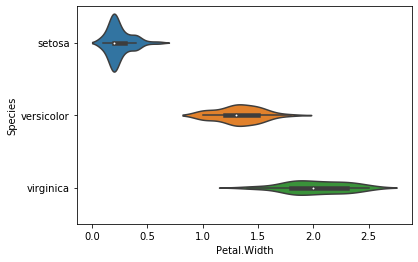

In [11]:
g = sns.violinplot(y='Species', x='Petal.Width', data=df)

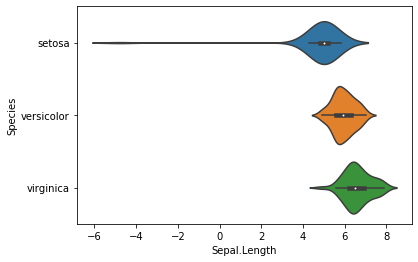

In [12]:
g = sns.violinplot(y='Species', x='Sepal.Length', data=df)

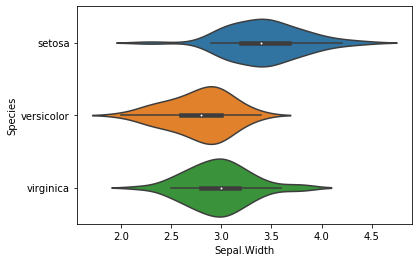

In [13]:
g = sns.violinplot(y='Species', x='Sepal.Width', data=df)

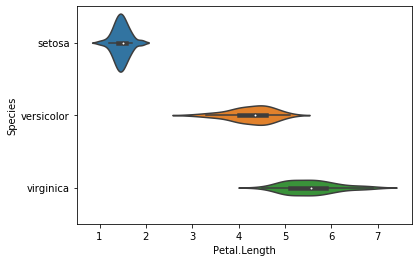

In [14]:
g = sns.violinplot(y='Species', x='Petal.Length', data=df)

### Machine Learning analysis

In [15]:
#Import libraries
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split